In [1]:
import numpy as np

In [2]:
import tensorflow as tf

In [3]:
import pandas as pd

In [4]:
import random

In [85]:
import matplotlib.pyplot as plt

In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [6]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
from tensorflow.keras.layers import CategoryEncoding, Embedding, GlobalAveragePooling1D

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from tensorflow.keras.models import Sequential

In [11]:
from tensorflow.keras.layers import Input, Dense

In [12]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop

## Importar os dados

In [14]:
df = pd.read_csv("../../../dados/nlp/news_sentiment_analysis.csv", encoding="utf-8")

In [15]:
# df

In [16]:
news_df = df[ ["Description", "Type"] ] 

In [17]:
news_df["Type"].unique()

array(['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology'], dtype=object)

In [18]:
tokenizer = Tokenizer()

In [19]:
tokenizer.fit_on_texts( news_df["Description"] )

In [49]:
max_palavras_dicionario = len(tokenizer.index_word)
max_palavras_dicionario

20859

In [21]:
tokenizer.index_word[12892]

'kaitlyn'

In [22]:
sequencias = tokenizer.texts_to_sequences( news_df["Description"] )

In [23]:
len(sequencias)

3500

In [24]:
print("Tamanho Sequencia 0: ", len(sequencias[0]))
print("Tamanho Sequencia 1: ", len(sequencias[1]))
print("Tamanho Sequencia 2: ", len(sequencias[2]))

Tamanho Sequencia 0:  58
Tamanho Sequencia 1:  15
Tamanho Sequencia 2:  77


In [25]:
max_features = 0
for sequencia in sequencias:
    if len(sequencia) > max_features:
        max_features = len(sequencia)
max_features

112

In [26]:
sequences_padded = pad_sequences( sequencias, padding="post" )

In [27]:
print("Tamanho Sequencia 0: ", len(sequences_padded[0]))
print("Tamanho Sequencia 1: ", len(sequences_padded[1]))
print("Tamanho Sequencia 2: ", len(sequences_padded[2]))

Tamanho Sequencia 0:  112
Tamanho Sequencia 1:  112
Tamanho Sequencia 2:  112


In [28]:
sequences_padded

array([[  598,  6262,   117, ...,     0,     0,     0],
       [12897,  3561,   211, ...,     0,     0,     0],
       [   28,    22,  2751, ...,     0,     0,     0],
       ...,
       [ 1070,   216,   231, ...,     0,     0,     0],
       [ 2980,   933,    31, ...,     0,     0,     0],
       [ 1070,   216,   231, ...,     0,     0,     0]])

## Codificando as saidas

['Business', 'Entertainment', 'General', 'Health', 'Science',
       'Sports', 'Technology']

Business = [ 1, 0, 0, 0, 0, 0, 0 ]
Entertainment = [ 0, 1, 0, 0, 0, 0, 0 ]
General = [ 0, 0, 1 , 0, 0, 0, 0 ]

In [30]:
output_encoder = LabelEncoder()

In [31]:
output_numeric = output_encoder.fit_transform( news_df["Type"] )
output_numeric

array([0, 0, 0, ..., 6, 6, 6])

Saida será algo como [ 0.2, 0.5, 0.3, 0.8, 0.1, 0.0, 0.6 ] 

In [33]:
output_encoder = CategoryEncoding(num_tokens=7, output_mode="one_hot")
output_encoded = output_encoder( output_numeric )  # Não funciona precisa transformar para numeros primeiro
output_encoded

<tf.Tensor: shape=(3500, 7), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [34]:
X = sequences_padded
print("X Shape: ", X.shape)
Y = output_encoded.numpy()
print("Y Shape: ", Y.shape)

X Shape:  (3500, 112)
Y Shape:  (3500, 7)


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, random_state = 100 )

In [36]:
seed_value = 100
# Assegura que todos os pesos iniciais serão gerados com a mesma semente
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

In [37]:
# modelo = Sequential()
# modelo.add( Input( (112,) ) )
# modelo.add( Dense( 128, activation="relu" ) )
# modelo.add( Dense( 7, activation="softmax" ) )
# modelo.summary()

In [61]:
modelo = Sequential()
modelo.add( Embedding( input_dim=(max_palavras_dicionario + 1), output_dim=100 ) )
modelo.add( GlobalAveragePooling1D() )
modelo.add( Dense( 128, activation="relu" ) )
modelo.add( Dense( 7, activation="softmax" ) )
modelo.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_3           │ ?                           │               0 │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [63]:
# opt = SGD(learning_rate = 0.000001)
# opt = Adam(learning_rate = 0.000001)
opt = RMSprop(learning_rate=0.001)
modelo.compile(optimizer = opt, loss="categorical_crossentropy", metrics=["accuracy"])

In [65]:
resultado = modelo.fit(X_train, Y_train, epochs=40, batch_size=32)

Epoch 1/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.1610 - loss: 1.9432
Epoch 2/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.1844 - loss: 1.9357
Epoch 3/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.2155 - loss: 1.9236
Epoch 4/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2476 - loss: 1.8986
Epoch 5/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.2926 - loss: 1.8473
Epoch 6/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.3436 - loss: 1.7628
Epoch 7/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4065 - loss: 1.6559
Epoch 8/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.4640 - loss: 1.5294
Epoch 9/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5444 - loss: 1.3830
Epoch 10/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6076 - loss: 1.2264
Epoch 11/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6585 - loss: 1.0761
Epoch 12/40
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy:

In [67]:
resultado_teste = modelo.evaluate(X_test, Y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8312 - loss: 0.5826


['Business', 'Entertainment', 'General', 'Health', 'Science', 'Sports', 'Technology']

Business = [ 1, 0, 0, 0, 0, 0, 0 ] 
Entertainment = [ 0, 1, 0, 0, 0, 0, 0 ] 
General = [ 0, 0, 1, 0, 0, 0, 0 ]
Health = [ 0, 0, 0, 1, 0, 0, 0 ]
Science = [ 0, 0, 0, 0, 1, 0, 0 ]
Sports = [ 0, 0, 0, 0, 0, 1, 0 ]
Technology = [ 0, 0, 0, 0, 0, 0, 1 ]

In [93]:
frase = "Climate changes generative heat waves"
sequencia_predict = np.array(tokenizer.texts_to_sequences( [frase] ))
print("sequencia_predict: ", sequencia_predict.shape)
sequencia_predict_padded = pad_sequences( sequencia_predict, maxlen=max_features, padding="post" )
print("sequencia_predict_padded:", sequencia_predict_padded.shape)
previsao = modelo.predict( sequencia_predict_padded )
print("Previsao: ", previsao)
np.argmax(previsao)

sequencia_predict:  (1, 5)
sequencia_predict_padded: (1, 112)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Previsao:  [[2.1435723e-02 6.2939746e-04 6.0999568e-04 4.8847385e-02 7.2746134e-01
  3.2463479e-03 1.9776969e-01]]


4

In [89]:
acuracia = np.array(resultado.history['accuracy'])
acuracia_norm = acuracia / np.max(acuracia)
loss = np.array(resultado.history['loss'])
loss_norm = loss / np.max(loss)

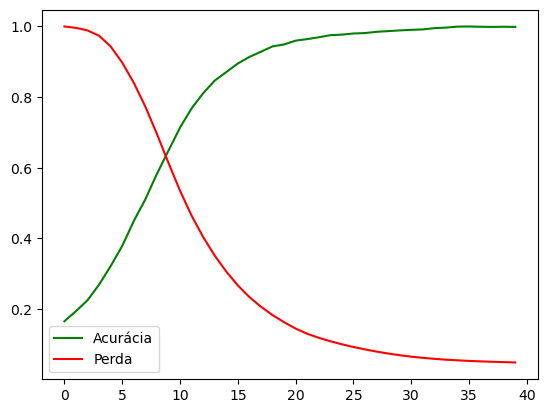

In [91]:
plt.plot(acuracia_norm, color="green", label="Acurácia")
plt.plot(loss_norm, color="red", label="Perda")
plt.legend()
plt.show()

TensorShape([875])

In [201]:

# y_pred_test = np.array(tf.one_hot(tf.argmax(y_pred, axis=1), depth = 7))
# y_pred_test.shape

28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


TensorShape([875])

tf.Tensor(
[[ 97   1   3   5  11   0  10]
 [  4  77   2   0  18   6   2]
 [  5   0 103   4   4   8   8]
 [  4   0   0 112   9   1   1]
 [  2   0   0   2 104   0   6]
 [  6   1   3   1   8 113   4]
 [  7   1   0   0  10   1 111]], shape=(7, 7), dtype=int32)


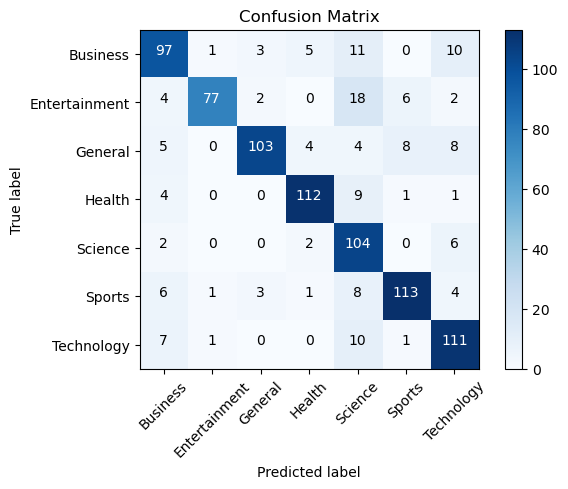

In [272]:
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# classes = np.unique(Y_label_test) # Get unique class labels
tick_marks = np.arange(len(classes))
classes = ['Business', 'Entertainment', 'General', 'Health', 'Science', 'Sports', 'Technology']
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add labels to each cell
thresh = np.argmax(conf_matrix) / 2.
for i, j in np.ndindex(tuple(conf_matrix.shape)):
    plt.text(j, i, conf_matrix[i, j].numpy(),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()